In [93]:
import rebound
import reboundx
import numpy as np
tmax = 1.e5
taue = -1.e1
dt = 7.e-2
P = 1.505
m=1.e-3

In [94]:
def setup():
    sim = rebound.Simulation()

    sim.add(m=1.)
    sim.add(m=m,a=1.)
    sim.add(m=m,P=P*sim.particles[1].P)
    sim.move_to_com() # Moves to the center of momentum frame
    ps = sim.particles

    rebx = reboundx.Extras(sim)
    damping = rebx.add("modify_orbits_forces")

    ps[1].params["tau_e"] = taue
    ps[2].params["tau_e"] = taue
    
    return sim

In [95]:
%%time
sim = setup()

Nout = 1000
EIAS15, eIAS15, aIAS15 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    EIAS15[i] = sim.calculate_energy()
    eIAS15[i] = sim.particles[1].e
    aIAS15[i] = sim.particles[1].a

CPU times: user 20.5 s, sys: 21.7 ms, total: 20.5 s
Wall time: 20.5 s


In [102]:
%%time
sim = setup()

sim.integrator="whfast"
sim.dt = ps[1].P*dt

Nout = 1000
EerrWHFAST, eerrWHFAST, aerrWHFAST, eWHFAST, aWHFAST = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    EerrWHFAST[i] = abs((Ef-EIAS15[i])/EIAS15[i])
    eerrWHFAST[i] = abs((sim.particles[1].e-eIAS15[i])/eIAS15[i])
    aerrWHFAST[i] = abs((sim.particles[1].a-aIAS15[i])/aIAS15[i])
    eWHFAST[i] = sim.particles[1].e
    aWHFAST[i] = sim.particles[1].a

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/rebound/simulation.py:508: RuntimeWarning: REBOUNDx: Passing a velocity-dependent force to WHFAST. Need to apply as an operator.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 411 ms, sys: 2.16 ms, total: 414 ms
Wall time: 412 ms


In [103]:
%%time
sim = setup()

sim.integrator="whfast"
sim.dt = ps[1].P*dt
rebx.integrator="rk4"
damping.force_as_operator = 1
damping.operator_order = 1

Nout = 1000
Eerrrk4, eerrrk4, aerrrk4, erk4, ark4 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.logspace(0.,np.log10(tmax),Nout)
for i,time in enumerate(times):
    sim.integrate(time)
    Ef = sim.calculate_energy()
    Eerrrk4[i] = abs((Ef-EIAS15[i])/EIAS15[i])
    eerrrk4[i] = abs((sim.particles[1].e-eIAS15[i])/eIAS15[i])
    aerrrk4[i] = abs((sim.particles[1].a-aIAS15[i])/aIAS15[i])
    erk4[i] = sim.particles[1].e
    ark4[i] = sim.particles[1].a

/Users/dtamayo/miniconda2/envs/p3/lib/python3.5/site-packages/rebound/simulation.py:508: RuntimeWarning: REBOUNDx: Passing a velocity-dependent force to WHFAST. Need to apply as an operator.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 409 ms, sys: 1.84 ms, total: 411 ms
Wall time: 410 ms


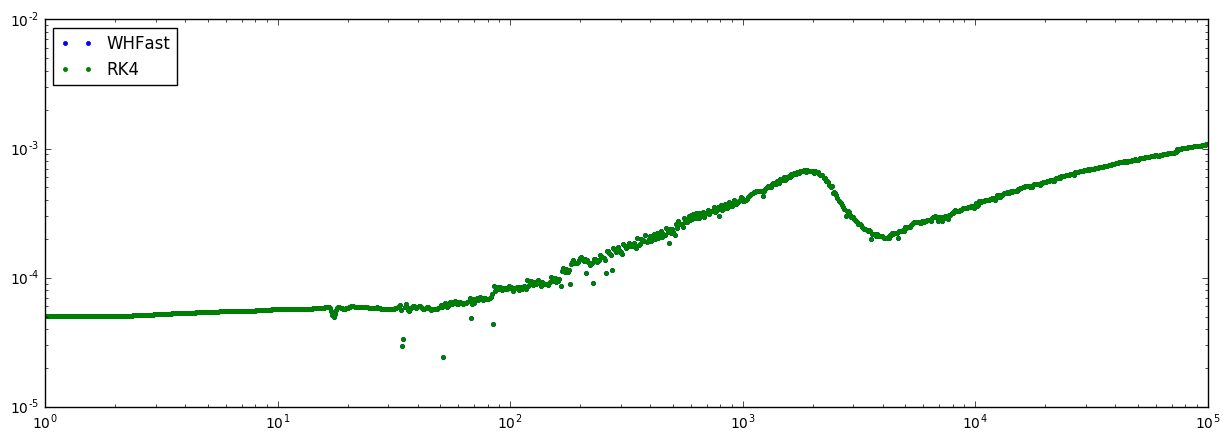

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,EerrWHFAST, '.', label='WHFast')
ax.plot(times,Eerrrk4, '.', label='RK4')
#ax.plot(times,EerrNoDamp, '.', label='NoDamp')
ax.legend(loc='upper left')

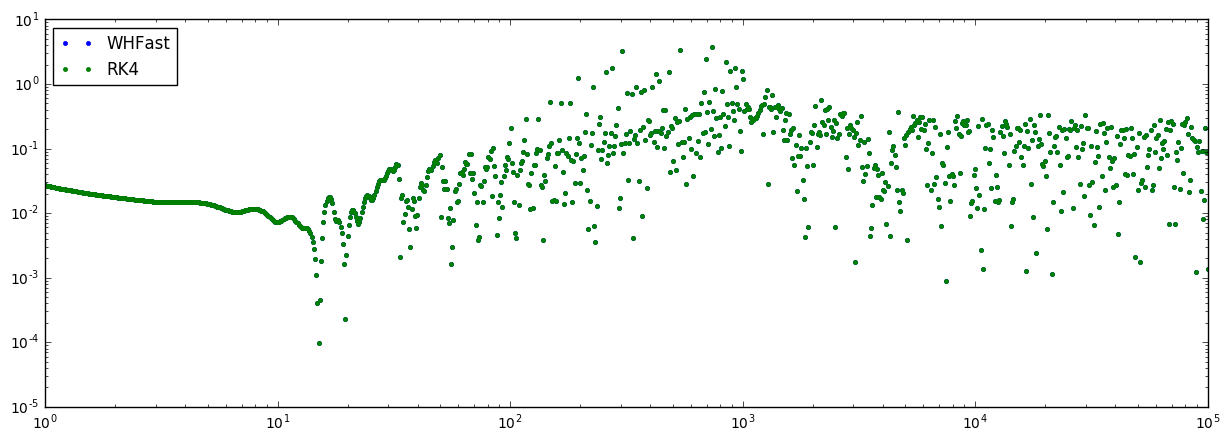

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,eerrWHFAST, '.', label='WHFast')
ax.plot(times,eerrrk4, '.', label='RK4')
#ax.plot(times,EerrNoDamp, '.', label='NoDamp')
ax.legend(loc='upper left')

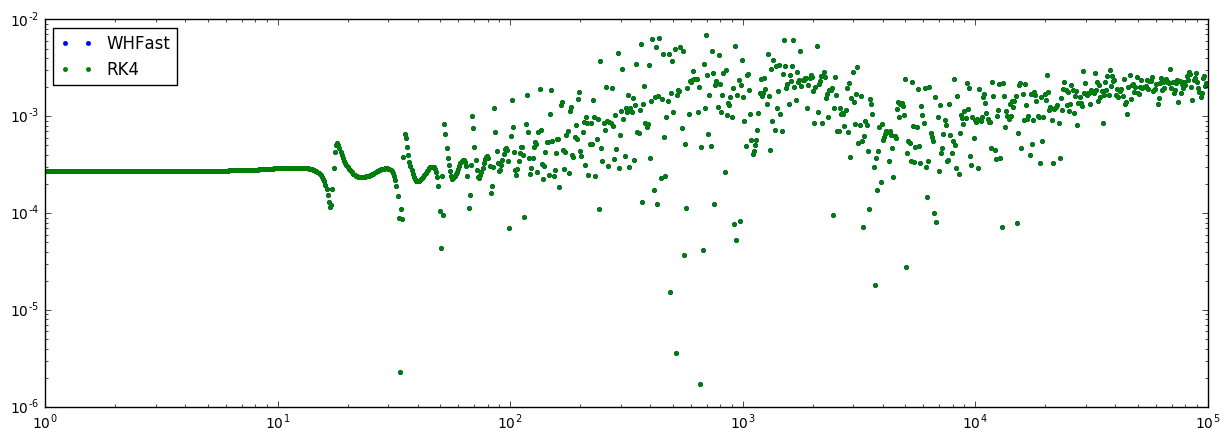

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,aerrWHFAST, '.', label='WHFast')
ax.plot(times,aerrrk4, '.', label='RK4')
#ax.plot(times,EerrNoDamp, '.', label='NoDamp')
ax.legend(loc='upper left')

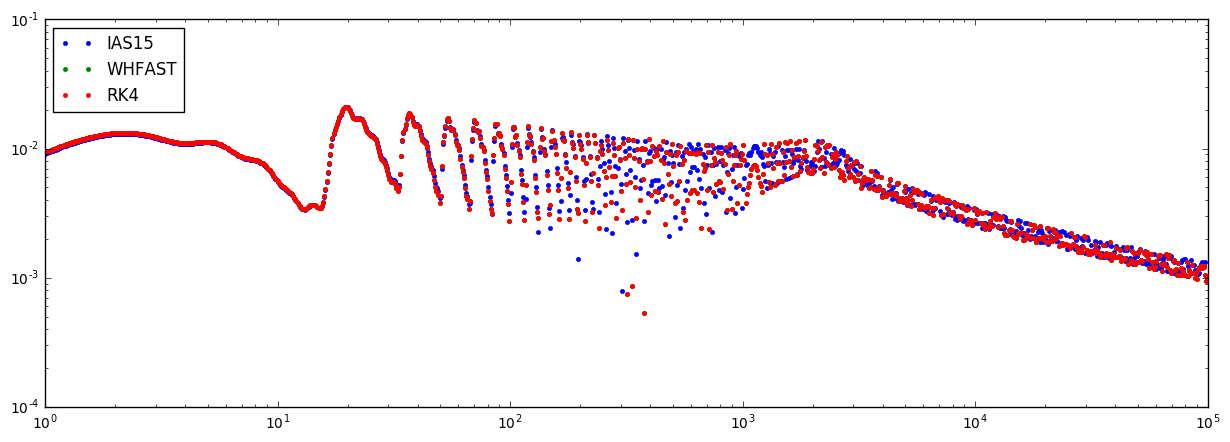

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,eIAS15, '.', label='IAS15')
ax.plot(times,eWHFAST, '.', label='WHFAST')
ax.plot(times,erk4, '.', label='RK4')
ax.legend(loc='upper left')

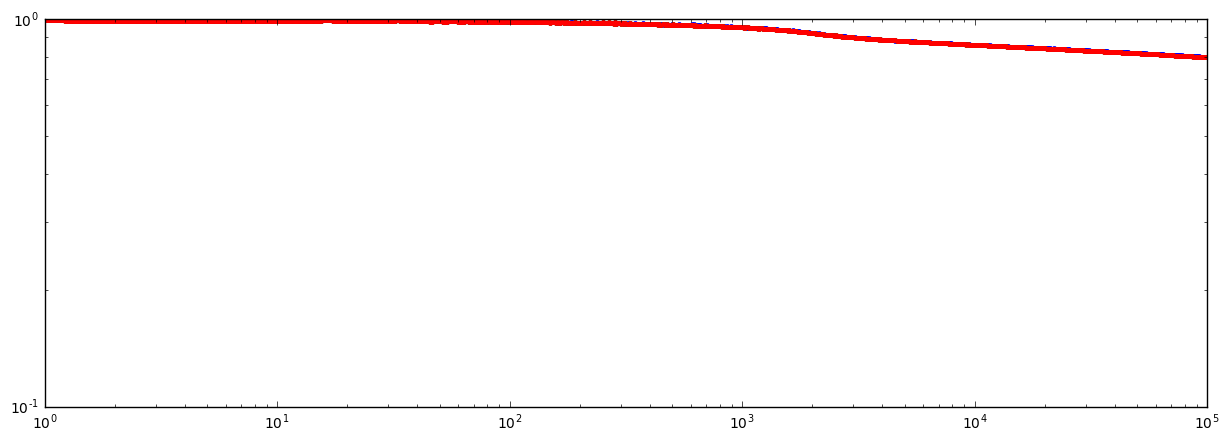

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(times,aIAS15, '.')
ax.plot(times,aWHFAST, '.')
ax.plot(times,ark4, '.')